<a href="https://colab.research.google.com/github/AmiteshArya/AmiteshArya/blob/main/Homework1AmiteshArya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1a.** The question is looking to find the probability that 25 employees approve the CEO, in other words, 25 successes. The probability that one employee approves is 0.5, given that *x* is distributed according to Bernoulli distribution, the probability that an employee does not approve of the ceo is 1-p, hence also 0.5. The formula for binomial distribution can be applied to this question as seen below

$P_x=\binom{n}{k}p^xq^{n-x}$ \\
$P_x=\binom{50}{25}0.5^{25}0.5^{50-25}$ \\
**$P_x=0.1123$** \\
Hence, the answer to question 1a is 0.1123.






**Question 1b.** When trying to find the probability that 25 employees approve the CEO using a Gaussian approximation, it is important to ensure that the shape of the binomial distribution is similar to the shape of gaussian distribution by checking if $np > 5$ and $nq > 5$. $np = nq = 50*0.5 = 25 > 5$

Next, in order to convert the value of X to a z value, we need to calculate the mean and the standard deviation.

$μ=np = 50*0.5 = 25$ \\
$σ = \sqrt{npq} = \sqrt{50*0.5*0.5} = 3.5355 $

Then to convert, applying continuity correction:

$P(X = 25) = P(24.5 < Y < 25.5)$ \\
$z = \frac{y-μ_y}{ \sigma_y} = \frac{25.5-25}{ 3.5355} = 0.1414$

$z = \frac{y-μ_y}{ \sigma_y} = \frac{24.5-25}{ 3.5355} = \phi (-0.1414)$

$P(X = 25) $ - Apply continuity correction
$P(24.5 < Y < 25.5) = P(25.5) - P(24.5)$ \\
Substitute in conversions

$ Φ(0.1414)-Φ(-0.1414) $ \\
Looking up these values in their respective Z tables yields

$0.5562 - 0.4438 = 0.1124$

**Hence, the answer to question 1b is 0.1124.**

Using Gaussian approximation yields an accurate answer, very close to the 0.1123 from part a.






**Question 2.** 

Urn 0 [0,1,1]

Urn 1 [0,0,0,0,0,1]

Fair Coin [H,T]

What is the probability of a specific sequence of the numbers on drawn balls being 0011?

To answer this question, one needs to consider all of the possible scenarios in which the outcome could occur. There are two scenarios that could achieve this sequence since there is a ball with the number 0 in each urn and the next urn, is the number on the previous ball selected.

Scenario 1: Coin Flip Heads (0.5), '0' ball from Urn 0 (1/3), '0' ball from Urn 0 (1/3), '1' ball from Urn 0 (2/3), '1' ball from Urn 1 (1/6) 

Scenario 2: Coin Flip Tails (0.5), '0' ball from Urn 1 (5/6), '0' ball from Urn 0 (1/3), '1' ball from Urn 0 (2/3), '1' ball from Urn 1 (1/6)

Apply product rule to each scenario, and then sum rule to find probability of outcome.

P(0011) = Scenario 1 + Scenario 2

$P(0011) = 0.5*\frac{1}{3}*\frac{1}{3}*\frac{2}{3}*\frac{1}{6} + 0.5*\frac{5}{6}*\frac{1}{3}*\frac{2}{3}*\frac{1}{6} $

$P(0011) = $ **0.0216**

Hence, the answer to question 2 is 0.0216.

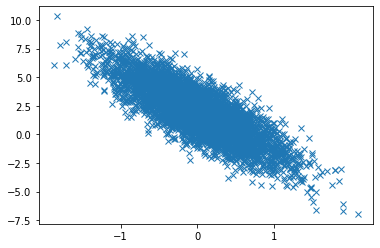

In [1]:
#Question 3
import numpy as np
import matplotlib.pyplot as plt

mean = [0, 2]
cov = [[0.3, -1], [-1, 5]] #Parameters from Example 6.6
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.xticks([-1,0,1])
plt.show()

In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download new-york-city/nyc-east-river-bicycle-crossings

  0% 0.00/1.78k [00:00<?, ?B/s]
100% 1.78k/1.78k [00:00<00:00, 2.44MB/s]


In [7]:
! unzip nyc-east-river-bicycle-crossings.zip

Archive:  nyc-east-river-bicycle-crossings.zip
  inflating: nyc-east-river-bicycle-counts.csv  


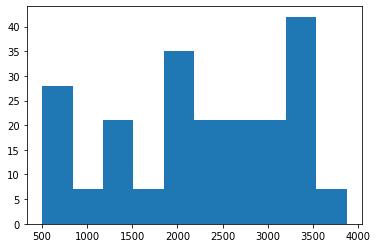

In [8]:
#Question 4, Part 1
import numpy as np
import pandas as pd
from pandas import *

import matplotlib
import matplotlib.pyplot as plt
data = read_csv("nyc-east-river-bicycle-counts.csv") #Pull csv into a data frame
cyclists = data['Brooklyn Bridge'].tolist() #pull brooklyn bridge column out

plt.hist(cyclists) #plot histogram of brooklyn bridge cyclists
plt.show()

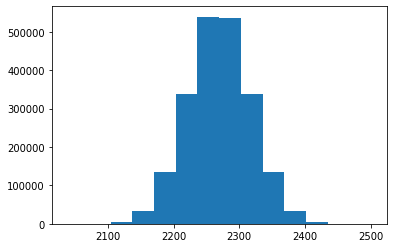

In [9]:
#Question 4, Part 2
#After understanding that lambda is the amount of occurrences of an event in a 
#set time period, in this case a day, I would average the occurences per day
#the data set and then use that as lambda for this generator.
import numpy as np
import pandas as pd
from pandas import *

import matplotlib
import matplotlib.pyplot as plt

data = read_csv("nyc-east-river-bicycle-counts.csv") #Pull csv into a data frame
cyclists = data['Brooklyn Bridge'].tolist() #pull brooklyn bridge column out

average = sum(cyclists) / len(cyclists)
s = np.random.poisson(average, 210*10000)
count, bins, ignored = plt.hist(s, 14)
plt.show()
#this histogram makes sense because the average count of cyclists on the 
#brooklyn bridge in a day was about 2270, therefore this histogram is 
#concentrated around that point. 

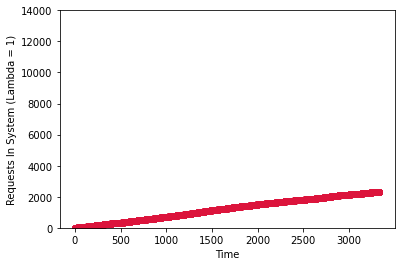

In [36]:
#Question 5 lambda = 1
import numpy as np
import matplotlib.pyplot as plt
serviceTimes = np.random.exponential(4,1000) #average of 4 time units to service each request
arrivals = np.random.poisson(1,10000) #average of 1 new request per time unit
times = []
requestsInSystem = []

currentRequests = 0
timeKeep = 0
nextBatch = 0
for serviceTime in serviceTimes:
  for i in range(int(serviceTime)): 
    timeKeep += 1
    currentRequests += arrivals[nextBatch] #adding new arrivals per time unit
    nextBatch += 1                    #iterate through next batch size of arrivals
    times.append(timeKeep)
    requestsInSystem.append(currentRequests)
  currentRequests -= 1 #removing 1 arrival since time to service has fulfilled
plt.plot(times, requestsInSystem, marker='o', color='crimson', linestyle='None')
plt.xlabel("Time")
plt.ylabel("Requests In System (Lambda = 1)")
plt.ylim([0, 14000])
plt.show()




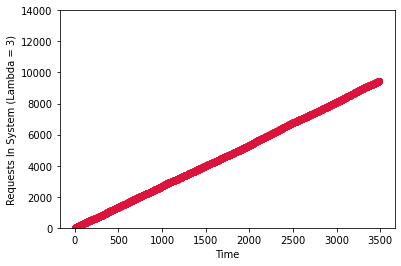

In [37]:
#Question 5 lambda = 3
import numpy as np
import matplotlib.pyplot as plt
serviceTimes = np.random.exponential(4,1000) #average of 4 time units to service each request
arrivals = np.random.poisson(3,10000) #average of 1 new request per time unit
times = []
requestsInSystem = []

currentRequests = 0
timeKeep = 0
nextBatch = 0
for serviceTime in serviceTimes:
  for i in range(int(serviceTime)): 
    timeKeep += 1
    currentRequests += arrivals[nextBatch] #adding new arrivals per time unit
    nextBatch += 1                    #iterate through next batch size of arrivals
    times.append(timeKeep)
    requestsInSystem.append(currentRequests)
  currentRequests -= 1 #removing 1 arrival since time to service has fulfilled
plt.plot(times, requestsInSystem, marker='o', color='crimson', linestyle='None')
plt.xlabel("Time")
plt.ylabel("Requests In System (Lambda = 3)")
plt.ylim([0, 14000])
plt.show()



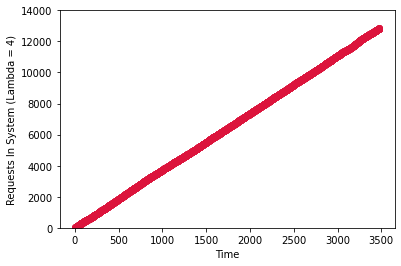

In [38]:
#Question 5 lambda = 4
import numpy as np
import matplotlib.pyplot as plt
serviceTimes = np.random.exponential(4,1000) #average of 4 time units to service each request
arrivals = np.random.poisson(4,10000) #average of 1 new request per time unit
times = []
requestsInSystem = []

currentRequests = 0
timeKeep = 0
nextBatch = 0
for serviceTime in serviceTimes:
  for i in range(int(serviceTime)): 
    timeKeep += 1
    currentRequests += arrivals[nextBatch] #adding new arrivals per time unit
    nextBatch += 1                    #iterate through next batch size of arrivals
    times.append(timeKeep)
    requestsInSystem.append(currentRequests)
  currentRequests -= 1 #removing 1 arrival since time to service has fulfilled
plt.plot(times, requestsInSystem, marker='o', color='crimson', linestyle='None')
plt.xlabel("Time")
plt.ylabel("Requests In System (Lambda = 4)")
plt.ylim([0, 14000])
plt.show()



**Question 5 Observations**

As the average size of arrivals per time unit (λ) increases, the amount of requests waiting in the queue increase. From the start, the average amount of time taken to handle each request (4 time units) is already a much slower than the average rate of arrival, it makes sense the the amount of requests in the queue would quickly outpace the rate at which these requests are being served. Even more so, when you increase λ to 3 or 4. 